In [14]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv("crop_recommendation.csv")
df

,N,P,K,Temperature,Humidity,pH,Moisture,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee


In [ ]:
label_encoder = LabelEncoder()
df['Crop'] = label_encoder.fit_transform(df['Crop'])
df

,N,P,K,Temperature,Humidity,pH,Moisture,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


In [ ]:
X = df.drop(['Crop'], axis='columns')
y = df['Crop']

In [ ]:
y = to_categorical(y, int(y.max()+1))
y

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
display(X, X.shape)
display(y, y.shape)

,N,P,K,Temperature,Humidity,pH,Moisture
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


(2200, 7)

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

(2200, 22)

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
model = Sequential()
model.add(Input((X.shape[1],)))
model.add(Dense(32, kernel_initializer="uniform", activation='relu'))
model.add(Dense(32, kernel_initializer="uniform", activation='relu'))
model.add(Dense(y.shape[1], kernel_initializer="uniform", activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=0)

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

Test loss: 0.0682884007692337
Test accuracy: 0.9666666388511658


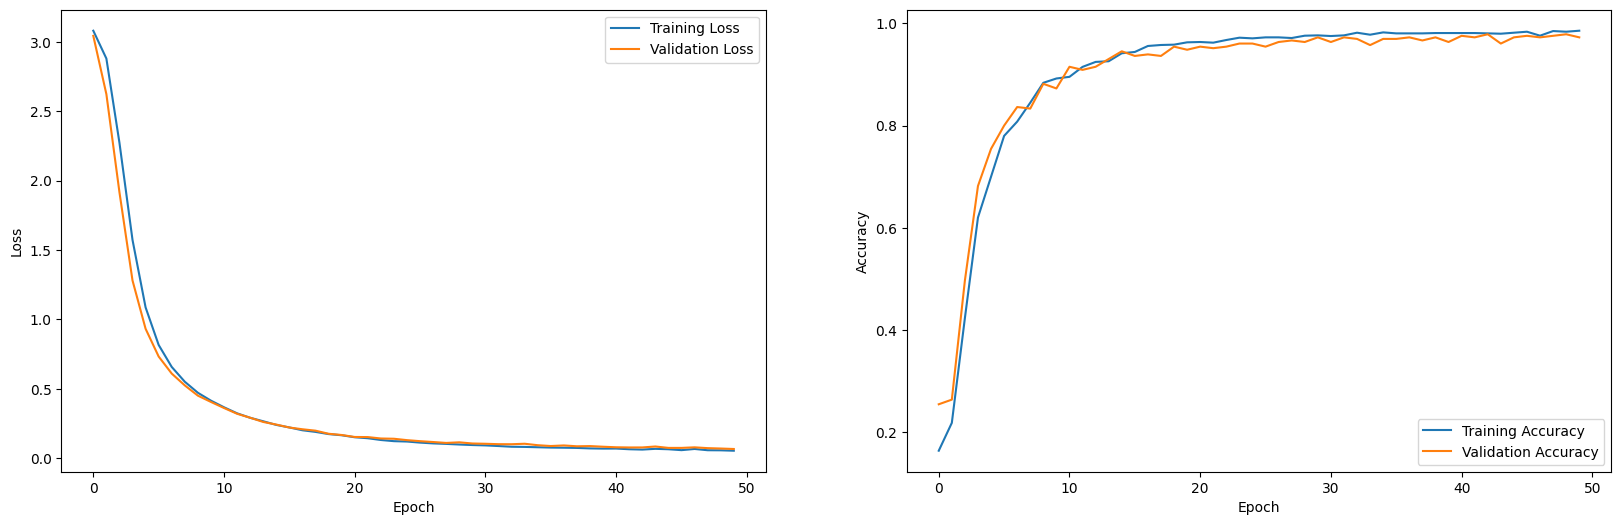

In [ ]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [28]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
df = pd.read_csv("fertilizer_prediction.csv")
df

,Temperature,Humidity,Moisture,pH,N,P,K,Crop,Fertilizer
0,32.0,60.0,45.0,6.0,0.4,0.5,0.8,Maize,Good NPK
1,35.0,66.0,48.0,5.8,0.2,0.7,0.6,Maize,MOP
2,35.0,66.0,48.0,5.8,0.2,0.7,0.6,Maize,Urea
3,29.0,36.0,17.0,6.5,0.3,0.7,0.6,Maize,MOP
4,29.0,36.0,17.0,6.5,0.3,0.7,0.6,Maize,Urea
...,...,...,...,...,...,...,...,...,...
1915,31.0,48.0,66.0,6.0,0.8,0.8,0.9,Sugarcane,Good NPK
1916,31.0,48.0,66.0,6.0,0.9,0.8,0.9,Sugarcane,Good NPK
1917,35.0,54.0,71.0,6.4,0.7,0.9,0.9,Sugarcane,Good NPK
1918,35.0,54.0,71.0,6.4,0.8,0.9,0.9,Sugarcane,Good NPK


In [30]:
label_encoder = LabelEncoder()
df['Crop'] = label_encoder.fit_transform(df['Crop'])
df

,Temperature,Humidity,Moisture,pH,N,P,K,Crop,Fertilizer
0,32.0,60.0,45.0,6.0,0.4,0.5,0.8,4,Good NPK
1,35.0,66.0,48.0,5.8,0.2,0.7,0.6,4,MOP
2,35.0,66.0,48.0,5.8,0.2,0.7,0.6,4,Urea
3,29.0,36.0,17.0,6.5,0.3,0.7,0.6,4,MOP
4,29.0,36.0,17.0,6.5,0.3,0.7,0.6,4,Urea
...,...,...,...,...,...,...,...,...,...
1915,31.0,48.0,66.0,6.0,0.8,0.8,0.9,6,Good NPK
1916,31.0,48.0,66.0,6.0,0.9,0.8,0.9,6,Good NPK
1917,35.0,54.0,71.0,6.4,0.7,0.9,0.9,6,Good NPK
1918,35.0,54.0,71.0,6.4,0.8,0.9,0.9,6,Good NPK


In [31]:
X = df.drop(['Crop', 'Fertilizer'], axis='columns')
y = df['Crop']

In [32]:
display(X, X.shape)
display(y, y.shape)

,Temperature,Humidity,Moisture,pH,N,P,K
0,32.0,60.0,45.0,6.0,0.4,0.5,0.8
1,35.0,66.0,48.0,5.8,0.2,0.7,0.6
2,35.0,66.0,48.0,5.8,0.2,0.7,0.6
3,29.0,36.0,17.0,6.5,0.3,0.7,0.6
4,29.0,36.0,17.0,6.5,0.3,0.7,0.6
...,...,...,...,...,...,...,...
1915,31.0,48.0,66.0,6.0,0.8,0.8,0.9
1916,31.0,48.0,66.0,6.0,0.9,0.8,0.9
1917,35.0,54.0,71.0,6.4,0.7,0.9,0.9
1918,35.0,54.0,71.0,6.4,0.8,0.9,0.9


(1920, 7)

0       4
1       4
2       4
3       4
4       4
       ..
1915    6
1916    6
1917    6
1918    6
1919    6
Name: Crop, Length: 1920, dtype: int64

(1920,)

In [33]:
y = to_categorical(y, int(y.max()+1))
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [34]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50)

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [36]:
model = Sequential()
model.add(Input((X.shape[1],)))
model.add(Dense(32, kernel_initializer="uniform", activation='relu'))
model.add(Dense(32, kernel_initializer="uniform", activation='relu'))
model.add(Dense(y.shape[1], kernel_initializer="uniform", activation='softmax'))

In [37]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=0)

In [39]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

Test loss: 0.6419464945793152
Test accuracy: 0.78125


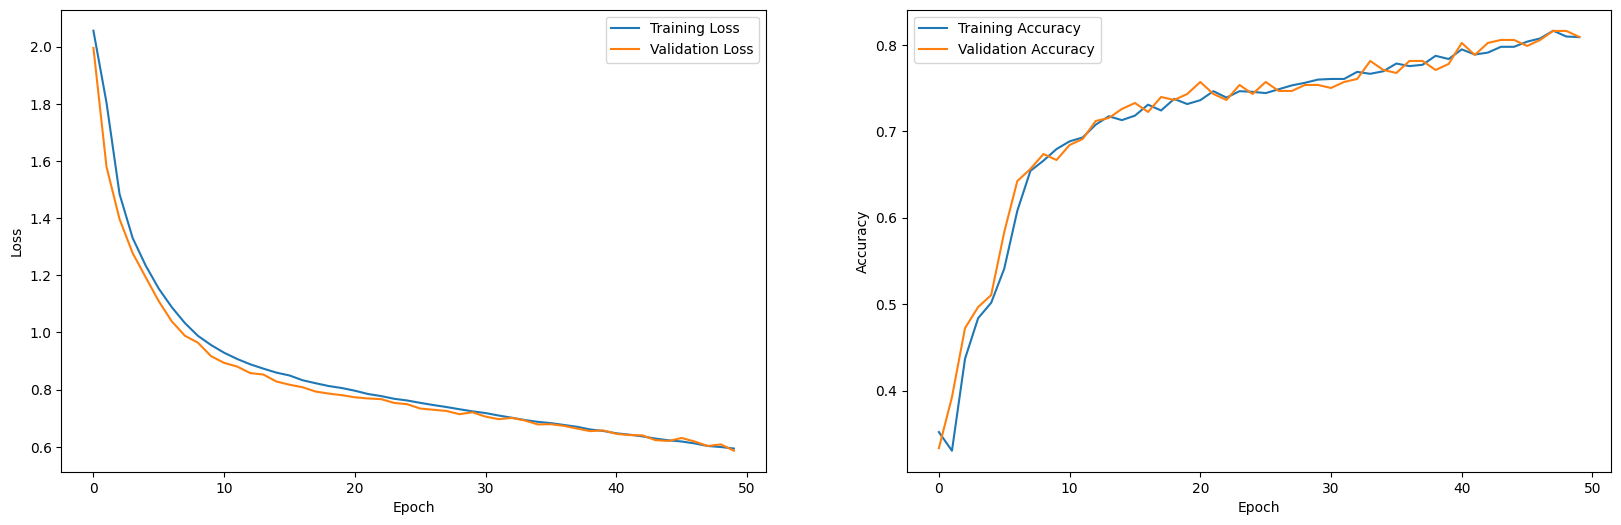

In [40]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()